In [ ]:
import string
import pandas as pd
import numpy as np
import re

filename = "Youtube_scrapping.csv"
data = pd.read_csv(filename, encoding = 'latin-1')
data.head(20)

,nama,like_count,text
0,@kuatbasuki8414,0,Anis gk punta orogram!anya menyindir dan menya...
1,@tonitanamal5540,0,Nangis aja mendingan lu bowo
2,@nadacute6474,0,kalau dak ada petani orang2 kota pd kelaparan ...
3,@nadacute6474,0,nanti ganjar jd petani semakin menangis beli p...
4,@nadacute6474,0,milih anis atau probowo petani kecil bebas bel...
5,@triwardhani3631,0,Menurut cerita Negara Palestina Keturunan Nabi...
6,@fidelaja3856,0,Mantap Pak Anies
7,@mulkizhafrani4536,0,No.2 selalu di hati
8,@martabakfavoriteayyu8517,0,Jujur kemarin saya masih ragu milih no 2 dan 3...
9,@user-kb3xg4xq4v,0,"Pak Ganjar, apakah bapak Tidak lihat di wilaya..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nama        100 non-null    object
 1   like_count  100 non-null    int64 
 2   text        100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
data.shape

(100, 3)

In [ ]:
data = data.dropna()
data.isnull().sum()

nama          0
like_count    0
text          0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()


0

In [ ]:
data.drop(columns = ['nama', 'like_count'], inplace = True)
data.columns = ['text']
data.head()

,text
0,Anis gk punta orogram!anya menyindir dan menya...
1,Nangis aja mendingan lu bowo
2,kalau dak ada petani orang2 kota pd kelaparan ...
3,nanti ganjar jd petani semakin menangis beli p...
4,milih anis atau probowo petani kecil bebas bel...


In [ ]:
# Case Folding: Mengubah semua teks menjadi huruf kecil
data['komen case folding'] = data['text'].str.lower()

print("\n Setelah Case Folding:")
(data.head(20))


 Setelah Case Folding:


,text,komen case folding
0,Anis gk punta orogram!anya menyindir dan menya...,anis gk punta orogram!anya menyindir dan menya...
1,Nangis aja mendingan lu bowo,nangis aja mendingan lu bowo
2,kalau dak ada petani orang2 kota pd kelaparan ...,kalau dak ada petani orang2 kota pd kelaparan ...
3,nanti ganjar jd petani semakin menangis beli p...,nanti ganjar jd petani semakin menangis beli p...
4,milih anis atau probowo petani kecil bebas bel...,milih anis atau probowo petani kecil bebas bel...
5,Menurut cerita Negara Palestina Keturunan Nabi...,menurut cerita negara palestina keturunan nabi...
6,Mantap Pak Anies,mantap pak anies
7,No.2 selalu di hati,no.2 selalu di hati
8,Jujur kemarin saya masih ragu milih no 2 dan 3...,jujur kemarin saya masih ragu milih no 2 dan 3...
9,"Pak Ganjar, apakah bapak Tidak lihat di wilaya...","pak ganjar, apakah bapak tidak lihat di wilaya..."


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = data.dropna(subset=['komen case folding'])

In [ ]:
# Tokenizing: proses menguraikan suatu teks atau dokumen menjadi unit-unit yang lebih kecil yang disebut dengan token
data['komen tokenized'] = data['komen case folding'].apply(word_tokenize)

print("\n Data Setelah Tokenizing:")
(data.head(20))


 Data Setelah Tokenizing:


,text,komen case folding,komen tokenized
0,Anis gk punta orogram!anya menyindir dan menya...,anis gk punta orogram!anya menyindir dan menya...,"[anis, gk, punta, orogram, !, anya, menyindir,..."
1,Nangis aja mendingan lu bowo,nangis aja mendingan lu bowo,"[nangis, aja, mendingan, lu, bowo]"
2,kalau dak ada petani orang2 kota pd kelaparan ...,kalau dak ada petani orang2 kota pd kelaparan ...,"[kalau, dak, ada, petani, orang2, kota, pd, ke..."
3,nanti ganjar jd petani semakin menangis beli p...,nanti ganjar jd petani semakin menangis beli p...,"[nanti, ganjar, jd, petani, semakin, menangis,..."
4,milih anis atau probowo petani kecil bebas bel...,milih anis atau probowo petani kecil bebas bel...,"[milih, anis, atau, probowo, petani, kecil, be..."
5,Menurut cerita Negara Palestina Keturunan Nabi...,menurut cerita negara palestina keturunan nabi...,"[menurut, cerita, negara, palestina, keturunan..."
6,Mantap Pak Anies,mantap pak anies,"[mantap, pak, anies]"
7,No.2 selalu di hati,no.2 selalu di hati,"[no.2, selalu, di, hati]"
8,Jujur kemarin saya masih ragu milih no 2 dan 3...,jujur kemarin saya masih ragu milih no 2 dan 3...,"[jujur, kemarin, saya, masih, ragu, milih, no,..."
9,"Pak Ganjar, apakah bapak Tidak lihat di wilaya...","pak ganjar, apakah bapak tidak lihat di wilaya...","[pak, ganjar, ,, apakah, bapak, tidak, lihat, ..."


In [ ]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

In [ ]:
# Normalization: Hapus karakter khusus, angka, dan kata-kata berhenti
stop_words = set(stopwords.words('indonesian'))
data['komen normalized'] = data['komen tokenized'].apply(lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words])
print("\nData Setelah Normalization:")
(data.head(20))

In [ ]:
pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Stemming menggunakan Snowball Stemmer untuk Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['komen stemming'] = data['komen normalized'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
print("\nData Setelah Stemming:")
(data.head(20))


Data Setelah Stemming:


,text,komen case folding,komen tokenized,komen normalized,komen stemming
0,Anis gk punta orogram!anya menyindir dan menya...,anis gk punta orogram!anya menyindir dan menya...,"[anis, gk, punta, orogram, !, anya, menyindir,...","[anis, gk, punta, orogram, anya, menyindir, me...","[anis, gk, punta, orogram, anya, sindir, salah..."
1,Nangis aja mendingan lu bowo,nangis aja mendingan lu bowo,"[nangis, aja, mendingan, lu, bowo]","[nangis, aja, mendingan, lu, bowo]","[nang, aja, mending, lu, bowo]"
2,kalau dak ada petani orang2 kota pd kelaparan ...,kalau dak ada petani orang2 kota pd kelaparan ...,"[kalau, dak, ada, petani, orang2, kota, pd, ke...","[dak, petani, kota, pd, kelaparan, tolong, pik...","[dak, tani, kota, pd, lapar, tolong, pikir, tani]"
3,nanti ganjar jd petani semakin menangis beli p...,nanti ganjar jd petani semakin menangis beli p...,"[nanti, ganjar, jd, petani, semakin, menangis,...","[ganjar, jd, petani, menangis, beli, pupuk, ua...","[ganjar, jd, tani, menang, beli, pupuk, uang, ..."
4,milih anis atau probowo petani kecil bebas bel...,milih anis atau probowo petani kecil bebas bel...,"[milih, anis, atau, probowo, petani, kecil, be...","[milih, anis, probowo, petani, bebas, beli]","[milih, anis, probowo, tani, bebas, beli]"
5,Menurut cerita Negara Palestina Keturunan Nabi...,menurut cerita negara palestina keturunan nabi...,"[menurut, cerita, negara, palestina, keturunan...","[cerita, negara, palestina, keturunan, nabi, m...","[cerita, negara, palestina, turun, nabi, musa,..."
6,Mantap Pak Anies,mantap pak anies,"[mantap, pak, anies]","[mantap, anies]","[mantap, anies]"
7,No.2 selalu di hati,no.2 selalu di hati,"[no.2, selalu, di, hati]",[hati],[hati]
8,Jujur kemarin saya masih ragu milih no 2 dan 3...,jujur kemarin saya masih ragu milih no 2 dan 3...,"[jujur, kemarin, saya, masih, ragu, milih, no,...","[jujur, kemarin, ragu, milih, no, br, tpi, man...","[jujur, kemarin, ragu, milih, no, br, tpi, man..."
9,"Pak Ganjar, apakah bapak Tidak lihat di wilaya...","pak ganjar, apakah bapak tidak lihat di wilaya...","[pak, ganjar, ,, apakah, bapak, tidak, lihat, ...","[ganjar, lihat, wilayah, lokasi, tinggal, jala...","[ganjar, lihat, wilayah, lokasi, tinggal, jala..."


In [ ]:
# Data Komen Bersih
data['komen bersih'] = data['komen normalized'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

print("\nData Clean:")
data.to_csv("dataset_clean.csv", index=False)
(data.head(20))


Data Clean:


,text,komen case folding,komen tokenized,komen normalized,komen stemming,komen bersih
0,Anis gk punta orogram!anya menyindir dan menya...,anis gk punta orogram!anya menyindir dan menya...,"[anis, gk, punta, orogram, !, anya, menyindir,...","[anis, gk, punta, orogram, anya, menyindir, me...","[anis, gk, punta, orogram, anya, sindir, salah...",anis gk punta orogram anya sindir salah gk kas...
1,Nangis aja mendingan lu bowo,nangis aja mendingan lu bowo,"[nangis, aja, mendingan, lu, bowo]","[nangis, aja, mendingan, lu, bowo]","[nang, aja, mending, lu, bowo]",nang aja mending lu bowo
2,kalau dak ada petani orang2 kota pd kelaparan ...,kalau dak ada petani orang2 kota pd kelaparan ...,"[kalau, dak, ada, petani, orang2, kota, pd, ke...","[dak, petani, kota, pd, kelaparan, tolong, pik...","[dak, tani, kota, pd, lapar, tolong, pikir, tani]",dak tani kota pd lapar tolong pikir tani
3,nanti ganjar jd petani semakin menangis beli p...,nanti ganjar jd petani semakin menangis beli p...,"[nanti, ganjar, jd, petani, semakin, menangis,...","[ganjar, jd, petani, menangis, beli, pupuk, ua...","[ganjar, jd, tani, menang, beli, pupuk, uang, ...",ganjar jd tani menang beli pupuk uang kontan s...
4,milih anis atau probowo petani kecil bebas bel...,milih anis atau probowo petani kecil bebas bel...,"[milih, anis, atau, probowo, petani, kecil, be...","[milih, anis, probowo, petani, bebas, beli]","[milih, anis, probowo, tani, bebas, beli]",milih anis probowo tani bebas beli
5,Menurut cerita Negara Palestina Keturunan Nabi...,menurut cerita negara palestina keturunan nabi...,"[menurut, cerita, negara, palestina, keturunan...","[cerita, negara, palestina, keturunan, nabi, m...","[cerita, negara, palestina, turun, nabi, musa,...",cerita negara palestina turun nabi musa yg tin...
6,Mantap Pak Anies,mantap pak anies,"[mantap, pak, anies]","[mantap, anies]","[mantap, anies]",mantap anies
7,No.2 selalu di hati,no.2 selalu di hati,"[no.2, selalu, di, hati]",[hati],[hati],hati
8,Jujur kemarin saya masih ragu milih no 2 dan 3...,jujur kemarin saya masih ragu milih no 2 dan 3...,"[jujur, kemarin, saya, masih, ragu, milih, no,...","[jujur, kemarin, ragu, milih, no, br, tpi, man...","[jujur, kemarin, ragu, milih, no, br, tpi, man...",jujur kemarin ragu milih no br tpi mantap pili...
9,"Pak Ganjar, apakah bapak Tidak lihat di wilaya...","pak ganjar, apakah bapak tidak lihat di wilaya...","[pak, ganjar, ,, apakah, bapak, tidak, lihat, ...","[ganjar, lihat, wilayah, lokasi, tinggal, jala...","[ganjar, lihat, wilayah, lokasi, tinggal, jala...",ganjar lihat wilayah lokasi tinggal jalan ling...


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.pri

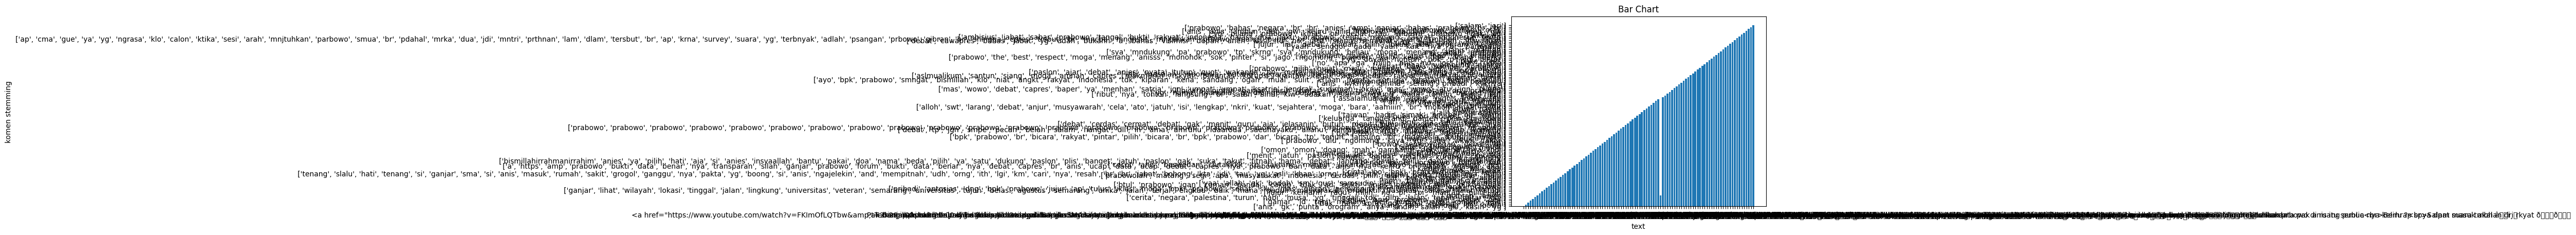

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#reading the database
data = pd.read_csv("dataset_clean.csv")

#Bar chart with text against komen stemming
plt.bar(data['text'], data['komen stemming'])

plt.title("Bar Chart")

#setting the X and Y labels
plt.xlabel('text')
plt.ylabel('komen stemming')

#adding the legends
plt.show()